In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

In [ ]:
"""
Support vector machines (SVMs) are a type of supervised learning algorithm that can be used for classification or regression 
tasks. Some common applications of SVMs include:

Text classification and sentiment analysis: SVMs can be used to classify documents into different categories (such as spam vs.
non-spam) or predict the sentiment of a piece of text (positive, negative, or neutral).

Image classification: SVMs can be used to classify images into different categories, such as identifying objects in an image or
classifying images by their content (e.g., landscape vs. portrait).

Handwriting recognition: SVMs can be used to recognize handwritten characters or digits by learning from a dataset of labeled 
examples.

Protein classification: In bioinformatics, SVMs can be used to classify proteins into different categories based on their 
sequence, structure, or function.

Fraud detection: SVMs can be used to detect fraudulent activity in financial transactions or other datasets by learning from
examples of fraudulent and non-fraudulent activity.

There are many other potential applications of SVMs, and they have been widely used in a variety of fields including finance, 
marketing, and medicine.

"""

In [ ]:
"""

There are several factors that can cause the accuracy of a support vector machine (SVM) to degrade:

Overfitting: If the SVM model is too complex for the given data, it may overfit the training data and perform poorly on unseen 
data. This can be addressed by using a simpler model or by using regularization to prevent overfitting.

Insufficient data: If the training data is not representative of the entire population, the SVM model may not generalize well to
unseen data. This can be addressed by collecting more diverse training data.

Noise in the data: If the training data contains a lot of noise (i.e., irrelevant or misleading information), the SVM model may 
be less accurate. Preprocessing the data to remove noise can improve the accuracy of the model.

Outliers: If the training data contains extreme outlier examples that are very different from the majority of the data, the SVM 
model may be less accurate. Outliers can be detected and removed from the data before training the model.

Choosing the wrong kernel function: The kernel function is a key hyperparameter in an SVM model, and choosing the wrong kernel 
function can significantly affect the model's accuracy. It is important to select the kernel function that is most appropriate 
for the given data and task.



"""

In [5]:
class SVM:
    def __init__(self, learning_rate=0.001, lambda_param = 0.01, n_iters = 1000):
        self.Ir = learning_rate
        self.lambda_ = lambda_param
        self.iteration = n_iters
        self.w = None
        self.b = None
        
    def fit(self, X, y):
        # fitting the data.
        n_samples, n_features = X.shape
        y = np.where(y <= 0, -1, 1)
        self.w = np.zeros(n_features)
        self.b = 0
        
        for i in range(self.iteration):
            for idx, x_i in enumerate(X):
                condition = y[idx]  * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.Ir * (2 * self.lambda_ * self.w)
                else:
                    self.w -= self.Ir * (2 * self.lambda_ * self.w - np.dot(y[idx], x_i))
                    self.b -= self.lambda_ * y[idx]
                                         
                                         
    def predict(self, X):
        # make prediction.
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)
            
                              

In [6]:
X, y = datasets.make_blobs(n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40 )

y = np.where(y == 0, -1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


In [7]:
clf = SVM()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
accuracy = np.sum(predictions == y_test) / len(y_test)
print(accuracy)


1.0


In [8]:
X.shape


(50, 2)

In [11]:
clf.w.shape

(2,)

In [12]:
y.shape

(50,)

In [13]:
X = [[1,2,3],
    [4,5,6]]

for idx, x_ in enumerate(X):
    print(idx, " ", x_)

0   [1, 2, 3]
1   [4, 5, 6]


In [26]:
# now data visualization comes.
type(X)

list

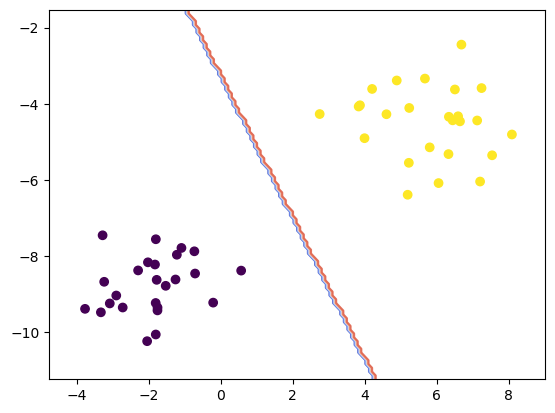

In [8]:

plt.scatter(X[:, 0], X[:, 1], c=y)

# create a grid of points
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# evaluate the model on the grid of points
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# plot the decision boundary
plt.contour(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# show the plot
plt.show()




